In [7]:
import sys

import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2

sys.path.append('..')
from higgs_inference import settings
from higgs_inference.various.utils import format_number

In [8]:
thetas = settings.thetas

# Plot four theta for each approach

In [9]:
def plot_neyman_distributions(output_filename, filename, folder='parameterized', n_bins=51):
    
    thetas_plot = [0,422,9,15]
    thetas_labels = ['SM', 'T', 'NT', 'X']
    
    distributions = np.load('../results/' + folder
                           +'/neyman_llr_vs_mle_distributions_'
                           + filename + '.npy')
    observeds = np.load('../results/' + folder
                           +'/neyman_llr_vs_mle_observeds_'
                           + filename + '.npy')
    p_values = np.load('../results/' + folder
                      + '/p_values_' + filename + '.npy')
    
    #print(distributions)
    #print(observeds)
    #print(p_values)
    
    plt.figure(figsize=(8,8))
    
    for i, (t, label) in enumerate(zip(thetas_plot, thetas_labels)):
        
        xmin = min(np.percentile(distributions[t], 1.), np.percentile(observeds[t], 5.))
        xmax = max(np.percentile(distributions[t], 99.), np.percentile(observeds[t], 95.))
        xmin = xmin - (xmax - xmin) * 0.2
        xmax = xmax + (xmax - xmin) * 0.2
        
        xvals = np.linspace(xmin, xmax, 200)
        
        plt.subplot(2, 2, i+1)
        plt.hist(distributions[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', alpha=0.2)
        plt.hist(observeds[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', alpha=0.2)
        plt.hist(distributions[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', histtype='step')
        plt.hist(observeds[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', histtype='step')
        
        plt.plot([], [], '-', c='C0', label=r'$p(q(\theta_{' + label + r'}) | \theta_{' + label + r'})$ (null)')
        plt.plot([], [], '-', c='C1', label=r'$p(q(\theta_{' + label + r'}) | \theta_{SM})$ (alternate)')
        plt.plot(xvals, chi2.pdf(xvals, 2), ls='--', c='C2', label=r'$\chi^2$ distribution')
        plt.plot([], [], ' ', label=r'Median $p$-value: ' + format_number(p_values[t]))
        plt.legend()
        
        plt.xlabel(r'$q(\theta_{' + label + r'})$')
        plt.ylabel(r'$p(q(\theta_{' + label + r'}))$')
        plt.xlim(xmin, xmax)
        plt.ylim(0., None)

    plt.tight_layout()
    plt.savefig('../figures/neyman/neyman_distribution_' + output_filename + '.pdf')

In [ ]:
plot_neyman_distributions('truth', 'truth', 'truth')
#plot_neyman_distributions('histo', 'histo_2d_new', 'histo')
plot_neyman_distributions('scoreregression', 'scoreregression_score', 'score_regression')
plot_neyman_distributions('carl', 'carl_shallow_new', 'parameterized')
#plot_neyman_distributions('combined', 'combined_deep_new', 'parameterized')
plot_neyman_distributions('regression', 'regression_new', 'parameterized')
#plot_neyman_distributions('combinedregression', 'combinedregression_deep_new', 'parameterized')


# Plot and analyse points with worst agreement

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in subtract


325 [-0.38266508  0.04129504] 0.025000000000000022 0.06599999999999995


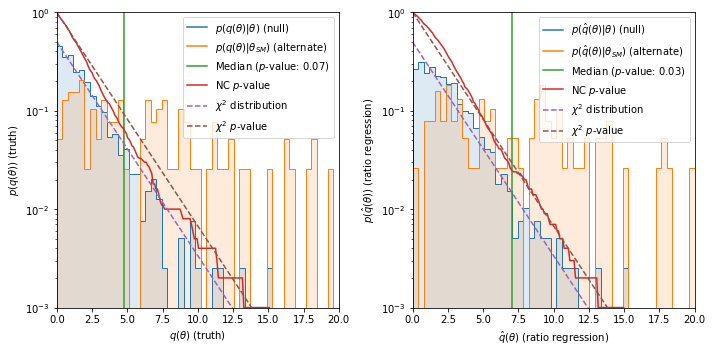

In [57]:
filename = 'regression_new'
folder = 'parameterized'

n_bins = 51
xmin, xmax = 0., 20.

distributions = np.load('../results/' + folder
                       +'/neyman_llr_vs_mle_distributions_'
                       + filename + '.npy')
observeds = np.load('../results/' + folder
                       +'/neyman_llr_vs_mle_observeds_'
                       + filename + '.npy')
p_values = np.load('../results/' + folder
                  + '/p_values_' + filename + '.npy')
distributions_truth = np.load('../results/truth/neyman_llr_vs_mle_distributions_truth.npy')
observeds_truth = np.load('../results/truth/neyman_llr_vs_mle_observeds_truth.npy')
p_values_truth = np.load('../results/truth/p_values_truth.npy')

errors = (np.log(p_values) - np.log(p_values_truth))**2
errors[np.invert(np.isfinite(errors))] = 0.
errors[p_values_truth < 0.03] = 0.
t = np.nanargmax( errors )
print(t, thetas[t], p_values[t], p_values_truth[t])

plt.figure(figsize=(10,5))



ax = plt.subplot(1,2,1)

xvals = np.linspace(xmin, xmax, 200)
p_values_nc = np.array([np.sum(distributions_truth[t] > x) / len(distributions_truth[t]) for x in xvals])

plt.hist(distributions_truth[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C0', alpha=0.15)
plt.hist(observeds_truth[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C1', alpha=0.15)
plt.hist(distributions_truth[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C0', histtype='step')
plt.hist(observeds_truth[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C1', histtype='step')

plt.plot([], [], '-', c='C0', label=r'$p(q(\theta) | \theta)$ (null)')
plt.plot([], [], '-', c='C1', label=r'$p(q(\theta) | \theta_{SM})$ (alternate)')
plt.axvline(x=np.median(observeds_truth[t]), ls='-', c='C2', label=r'Median ($p$-value: ' + format_number(p_values_truth[t]) + ')')
plt.plot(xvals, p_values_nc, ls='-', c='C3', label=r'NC $p$-value')
plt.plot(xvals, chi2.pdf(xvals, 2), ls='--', c='C4', label=r'$\chi^2$ distribution')
plt.plot(xvals, 1. - chi2.cdf(xvals, 2), ls='--', c='C5', label=r'$\chi^2$ $p$-value')
plt.legend()

plt.xlabel(r'$q(\theta)$ (truth)')
plt.ylabel(r'$p(q(\theta))$ (truth)')
ax.set_yscale("log", nonposy='clip')
plt.xlim(xmin, xmax)
plt.ylim(0.001, 1.)



ax = plt.subplot(1,2,2)

xvals = np.linspace(xmin, xmax, 200)
p_values_nc = np.array([np.sum(distributions[t] > x) / len(distributions[t]) for x in xvals])

plt.hist(distributions[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C0', alpha=0.15)
plt.hist(observeds[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C1', alpha=0.15)
plt.hist(distributions[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C0', histtype='step')
plt.hist(observeds[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C1', histtype='step')

plt.plot([], [], '-', c='C0', label=r'$p(\hat{q}(\theta) | \theta)$ (null)')
plt.plot([], [], '-', c='C1', label=r'$p(\hat{q}(\theta) | \theta_{SM})$ (alternate)')
plt.axvline(x=np.median(observeds[t]), ls='-', c='C2', label=r'Median ($p$-value: ' + format_number(p_values[t]) + ')')
plt.plot(xvals, p_values_nc, ls='-', c='C3', label=r'NC $p$-value')
plt.plot(xvals, chi2.pdf(xvals, 2), ls='--', c='C4', label=r'$\chi^2$ distribution')
plt.plot(xvals, 1. - chi2.cdf(xvals, 2), ls='--', c='C5', label=r'$\chi^2$ $p$-value')
plt.legend()

plt.xlabel(r'$\hat{q}(\theta)$ (ratio regression)')
plt.ylabel(r'$p(\hat{q}(\theta))$ (ratio regression)')
ax.set_yscale("log", nonposy='clip')
plt.xlim(xmin, xmax)
plt.ylim(0.001, 1.)



plt.tight_layout()
plt.savefig('../figures/debug/neyman_histograms_worst_agreement_regression.pdf')

800 [ 0.56604638 -0.02518729] 0.02100000000000002 0.02300000000000002


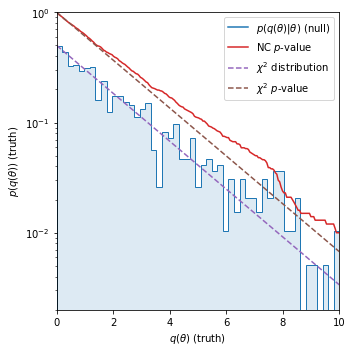

In [60]:
n_bins = 51
xmin, xmax = 0., 10.

distributions_truth = np.load('../results/truth/neyman_llr_vs_mle_distributions_truth.npy')
observeds_truth = np.load('../results/truth/neyman_llr_vs_mle_observeds_truth.npy')
p_values_truth = np.load('../results/truth/p_values_truth.npy')
q_cut_values_truth = np.load('../results/truth/neyman_qcut_truth.npy')

errors = (q_cut_values_truth - 5.99)
errors[np.invert(np.isfinite(errors))] = 0.
errors[p_values_truth < 0.01] = 0.
t = np.nanargmax( errors )
print(t, thetas[t], p_values[t], p_values_truth[t])

plt.figure(figsize=(5,5))
ax = plt.gca()

xvals = np.linspace(xmin, xmax, 200)
p_values_nc = np.array([np.sum(distributions_truth[t] > x) / len(distributions_truth[t]) for x in xvals])

plt.hist(distributions_truth[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C0', alpha=0.15)
#plt.hist(observeds_truth[t],
#         bins=n_bins, range=(xmin, xmax), density=True,
#         color='C1', alpha=0.15)
plt.hist(distributions_truth[t],
         bins=n_bins, range=(xmin, xmax), density=True,
         color='C0', histtype='step')
#plt.hist(observeds_truth[t],
#         bins=n_bins, range=(xmin, xmax), density=True,
#         color='C1', histtype='step')

plt.plot([], [], '-', c='C0', label=r'$p(q(\theta) | \theta)$ (null)')
#plt.plot([], [], '-', c='C1', label=r'$p(q(\theta) | \theta_{SM})$ (alternate)')
#plt.axvline(x=np.median(observeds_truth[t]), ls='-', c='C2', label=r'Median ($p$-value: ' + format_number(p_values_truth[t]) + ')')
plt.plot(xvals, p_values_nc, ls='-', c='C3', label=r'NC $p$-value')
plt.plot(xvals, chi2.pdf(xvals, 2), ls='--', c='C4', label=r'$\chi^2$ distribution')
plt.plot(xvals, 1. - chi2.cdf(xvals, 2), ls='--', c='C5', label=r'$\chi^2$ $p$-value')
plt.legend()

plt.xlabel(r'$q(\theta)$ (truth)')
plt.ylabel(r'$p(q(\theta))$ (truth)')
ax.set_yscale("log", nonposy='clip')
plt.xlim(xmin, xmax)
plt.ylim(0.002, 1.)



plt.tight_layout()
plt.savefig('../figures/debug/neyman_histograms_worst_agreement_with_asymptotics.pdf')